<a href="https://colab.research.google.com/github/GiX7000/deep-learning-with-pytorch/blob/main/intro_to_Pytorch(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A quick introduction to Pytorch, its features, key concepts and associated tools and libraries, Part 1.

Pytorch is an open source machine learning framework that accelarates the path from research prototyping to production deployment. Find more here: https://pytorch.org/.

## 1. Tensor Basics.

In [ ]:
import torch

In [ ]:
# create tensors. everything in deep learning has to do with twnsors
x1 = torch.empty(3, 3)
x2 = torch.randn(3,2)
x3 = torch.ones(3,2)
x4 = torch.zeros(3,2)
x5 = torch.tensor([3, 5])
print(x1)
print(x2)
print(x3.dtype)
print(x4.size())
print(x5)

tensor([[4.1722e-34, 0.0000e+00, 1.0725e+00],
        [4.1289e-01, 1.2386e+00, 2.9072e-01],
        [3.3009e-34, 0.0000e+00, 3.3013e-34]])
tensor([[ 0.3809, -0.3081],
        [ 1.9220, -0.4831],
        [-0.3849, -0.8822]])
torch.float32
torch.Size([3, 2])
tensor([3, 5])


In [ ]:
print(x2[:, 1]) # all elements from the second row
print(x2[0, :]) # all elements from the first row
print(x2[0,0].item()) # actual value of an element

tensor([-0.3081, -0.4831, -0.8822])
tensor([ 0.3809, -0.3081])
0.3809219002723694


In [ ]:
# some operations between tensors
y1 = torch.add(x2, x3)
y2 = torch.sub(x2, x3)
y3 = torch.mul(x2, x3)  # try also div operation
print(y1)
print(y2)
print(y3)

tensor([[ 1.7063,  1.5566],
        [-0.0725,  0.5871],
        [-0.2386,  0.7093]])
tensor([[-0.2937, -0.4434],
        [-2.0725, -1.4129],
        [-2.2386, -1.2907]])
tensor([[ 0.7063,  0.5566],
        [-1.0725, -0.4129],
        [-1.2386, -0.2907]])


In [ ]:
# add a single number in a tensor with add_
a = y3.add_(10)
print(a) 
print(a.dtype)

tensor([[20.7063, 20.5566],
        [18.9275, 19.5871],
        [18.7614, 19.7093]])
torch.float32


In [ ]:
x = torch.randn(4,4)
print(x)

tensor([[ 1.1057,  0.6431,  2.0922,  0.7599],
        [-0.0301, -0.1411,  0.5497,  1.5615],
        [-1.1288,  1.2645,  0.7969,  0.6944],
        [ 0.7365,  0.0767,  0.7164,  1.3825]])


In [ ]:
y = x.view(-1, 8) # (-1, 8) is equal to (16). here we should have the same dim with the above x(4,4)
print(y)
print(y.size())

tensor([[ 1.1057,  0.6431,  2.0922,  0.7599, -0.0301, -0.1411,  0.5497,  1.5615],
        [-1.1288,  1.2645,  0.7969,  0.6944,  0.7365,  0.0767,  0.7164,  1.3825]])
torch.Size([2, 8])


In [ ]:
# convert a tensor to numpy
b = x3.numpy()
print(x3)
print(b)
print(type(b))

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
[[1. 1.]
 [1. 1.]
 [1. 1.]]
<class 'numpy.ndarray'>


In [ ]:
# convert a numpy array to tensor
import numpy as np

c = np.ones(5)
print(c)
d = torch.from_numpy(c)
print(d)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
# if we add 1 in numpy array, look that 1 is also added in its tensor
c += 1
print(c)
print(d)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [ ]:
e = torch.ones(5, requires_grad=True) # we tell it that we need to calculate gradients later
e

tensor([1., 1., 1., 1., 1.], requires_grad=True)

## 2. Fundamentals of Autograd.

In [ ]:
import torch

In [ ]:
x = torch.randn(3, requires_grad=True)  # set it True because we need the gradients for backpropagation. If you do not define it here, you'll get an error later in backward() 
print(x)

y = x+2 # creates a node with x, 2 inputs and an operation of +
print(y)

z = y*y*2
print(z)

z2 = z.mean()
print(z2)

tensor([ 0.7568, -1.1296, -0.9280], requires_grad=True)
tensor([2.7568, 0.8704, 1.0720], grad_fn=<AddBackward0>)
tensor([15.1999,  1.5152,  2.2983], grad_fn=<MulBackward0>)
tensor(6.3378, grad_fn=<MeanBackward0>)


In [ ]:
# calculate the gradients
z2.backward()  # dz2/dx
print(x.grad)

tensor([0.9145, 2.8044, 3.4890])


In [ ]:
# backward() only for scalars. try this:
z.backward()
print(x.grads)

RuntimeError: ignored

In [ ]:
# but if the last calculation is not a scalar, we need to give to backward() an argument, which must have the same dims as x(which has requires_grad=True)
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v)
print(x.grad) # this is a vector jacobian product!

tensor([1.1027, 3.4816, 0.0043])


3 ways with which we can stop pytorch from creating gradient functions and tracking the history in computational graph.


In [ ]:
x = torch.randn(3, requires_grad=True)
print(x)

y = y+2
print(y)

# 1st way
x.requires_grad_(False)
print(x)

tensor([-0.5793,  0.8202,  1.3019], requires_grad=True)
tensor([6.7568, 4.8704, 5.0720], grad_fn=<AddBackward0>)
tensor([-0.5793,  0.8202,  1.3019])


In [ ]:
# 2nd way
x = torch.randn(3, requires_grad=True)
print(x)

z = x.detach()
print(z)

tensor([-0.2998, -0.0143,  0.3201], requires_grad=True)
tensor([-0.2998, -0.0143,  0.3201])


In [ ]:
# 3rd way
x = torch.randn(3, requires_grad=True)
print(x)

with torch.no_grad():
  y = x+2
  print(y)

tensor([0.8409, 0.3761, 2.1859], requires_grad=True)
tensor([2.8409, 2.3761, 4.1859])


In [ ]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(5):  # try 1, 2, 3, 4
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)    # print the grads of weights

  # before go to the next iteration, we must empty the gradients
  weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


3 things to remember here: every time you want to calculate the gradients, set requires_grad=True, call backward() and empty the gradients before the next operation by using grad.zero_().

## 3. Implementations of the simplests ever neural network in Pytorch.

The algorithm with which the training of the majority of neural nets is based on is comprised of the following steps: 1) forward pass and compute the loss, 2) compute local gradients, 3) backward pass by computing dLoss/dweights using the chain rule, 4) update the weights and 5) do it until accumulate weights' best values.

In [ ]:
# manually execution of the training process of the simplest ever network
import numpy as np

# our data and their corresponding real values
X = np.array([1, 2, 3, 4], dtype=np.float32)
Y = np.array([2, 4, 6, 8], dtype=np.float32)

# initialize the weight
w = 0.0

# forward pass=model's prediction
def forward(x):
  return w * x

# loss = MSE => J =  1/N * (w*x - y)**2
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

# gradient => dJ/dw = 1/N * 2x(w*x-y)
def gradient(x, y, y_predicted):
  return np.dot(2*x, y_predicted-y).mean()

print(f'prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
  # prediction/forward pass
  y_pred = forward(X)

  # compute loss
  l = loss(Y, y_pred)

  # gradients computation with respect to w
  dw = gradient(X, Y, y_pred)

  # update weights
  w -= learning_rate * dw

  if epoch % 1 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')

prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 30.00000000
epoch 2: w = 1.680, loss = 4.79999924
epoch 3: w = 1.872, loss = 0.76800019
epoch 4: w = 1.949, loss = 0.12288000
epoch 5: w = 1.980, loss = 0.01966083
epoch 6: w = 1.992, loss = 0.00314574
epoch 7: w = 1.997, loss = 0.00050331
epoch 8: w = 1.999, loss = 0.00008053
epoch 9: w = 1.999, loss = 0.00001288
epoch 10: w = 2.000, loss = 0.00000206
prediction after training: f(5) = 9.999


In [ ]:
# the above's implementation in pytorch (1)
import torch

# our data and their corresponding real values
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

# initialize the weight
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True) # and of course, we don't forget to set requires_grad=True

# forward pass=model's prediction
def forward(x):
  return w * x

# loss = MSE => J =  1/N * (w*x - y)**2
def loss(y, y_predicted):
  return ((y_predicted-y)**2).mean()

print(f'prediction before training: f(5) = {forward(5):.3f}') 

# training
learning_rate = 0.01
n_iters = 60  # if the result is not correct, increase it! we started from 10 for example

for epoch in range(n_iters):
  # prediction/forward pass
  y_pred = forward(X)

  # compute loss
  l = loss(Y, y_pred)

  # the difference is that we do not manually calculate the gradient here
  # gradients = backward pass
  l.backward()  # dl/dw

  # update weights
  with torch.no_grad():
    w -= learning_rate * w.grad

  # zero gradients
  w.grad.zero_()  # before the next iteration, make sure the gradients are 0 again!

  if epoch % 1 ==0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {forward(5):.3f}')  # the expected output is 2 times the input value, so for input 5, we expect output 10!

prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 2: w = 0.555, loss = 21.67499924
epoch 3: w = 0.772, loss = 15.66018772
epoch 4: w = 0.956, loss = 11.31448650
epoch 5: w = 1.113, loss = 8.17471695
epoch 6: w = 1.246, loss = 5.90623236
epoch 7: w = 1.359, loss = 4.26725292
epoch 8: w = 1.455, loss = 3.08308983
epoch 9: w = 1.537, loss = 2.22753215
epoch 10: w = 1.606, loss = 1.60939169
epoch 11: w = 1.665, loss = 1.16278565
epoch 12: w = 1.716, loss = 0.84011245
epoch 13: w = 1.758, loss = 0.60698116
epoch 14: w = 1.794, loss = 0.43854395
epoch 15: w = 1.825, loss = 0.31684780
epoch 16: w = 1.851, loss = 0.22892261
epoch 17: w = 1.874, loss = 0.16539653
epoch 18: w = 1.893, loss = 0.11949898
epoch 19: w = 1.909, loss = 0.08633806
epoch 20: w = 1.922, loss = 0.06237914
epoch 21: w = 1.934, loss = 0.04506890
epoch 22: w = 1.944, loss = 0.03256231
epoch 23: w = 1.952, loss = 0.02352631
epoch 24: w = 1.960, loss = 0.01699772
epoch 25: w = 1.966, loss = 

In [ ]:
# the above's implementation in pytorch using a pytorch model (2)
import torch
import torch.nn as nn

# design th emodel

# construct loss, optimizer

# training loop; forward pass, backward pass, update weights

# our data and their corresponding real values
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

# create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

# instead of forward pass function and initialization of w, we use a pytorch model here that does all the work for us
model = nn.Linear(input_size, output_size)  


# the same above line can be replaced by the below my_model
# this is how to design your custom pytorch model
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim): 
    super(LinearRegression, self).__init__()
    # define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.lin(x)

my_model = LinearRegression(input_size, output_size)  # check it by replacing below model with model2




print(f'prediction before training: f(5) = {model(X_test).item():.3f}') 

# training
learning_rate = 0.01
n_iters = 70  # if the result is not correct, increase it!

loss = nn.MSELoss() # replaces our custom loss function from the previous example. it does exactly the same
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
  # prediction/forward pass. now, we juct call model(X)
  y_pred = model(X)

  # compute loss
  l = loss(Y, y_pred)

  # the difference is that we do not manually calculate the gradient here
  # gradients = backward pass
  l.backward()  # dl/dw

  # update weights. this time optimizer does it for us
  optimizer.step()

  # zero gradients
  optimizer.zero_grad()  # before the next iteration, make sure the gradients are 0 again!

  if epoch % 1 ==0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:.8f}')

print(f'prediction after training: f(5) = {model(X_test).item():.3f}')  # the expected output is 2 times the input value, so for input 5, we expect output 10!

4 1
prediction before training: f(5) = 2.829
epoch 1: w = 0.905, loss = 17.13798714
epoch 2: w = 1.094, loss = 11.89221096
epoch 3: w = 1.251, loss = 8.25227547
epoch 4: w = 1.381, loss = 5.72659826
epoch 5: w = 1.490, loss = 3.97408223
epoch 6: w = 1.581, loss = 2.75804472
epoch 7: w = 1.657, loss = 1.91425753
epoch 8: w = 1.720, loss = 1.32876968
epoch 9: w = 1.772, loss = 0.92250854
epoch 10: w = 1.816, loss = 0.64060968
epoch 11: w = 1.852, loss = 0.44500309
epoch 12: w = 1.882, loss = 0.30927289
epoch 13: w = 1.907, loss = 0.21508938
epoch 14: w = 1.928, loss = 0.14973462
epoch 15: w = 1.946, loss = 0.10438359
epoch 16: w = 1.960, loss = 0.07291250
epoch 17: w = 1.972, loss = 0.05107242
epoch 18: w = 1.982, loss = 0.03591515
epoch 19: w = 1.991, loss = 0.02539507
epoch 20: w = 1.998, loss = 0.01809257
epoch 21: w = 2.003, loss = 0.01302266
epoch 22: w = 2.008, loss = 0.00950197
epoch 23: w = 2.012, loss = 0.00705621
epoch 24: w = 2.016, loss = 0.00535647
epoch 25: w = 2.018, loss 

the prediction is not perfect, so you can play with the number of iterations and the learning rate.

## 4. A very simple Linear Regression with Pytorch.

In [ ]:
from sklearn import datasets

epoch: 10, loss = 4088.8018
epoch: 20, loss = 2880.5369
epoch: 30, loss = 2056.9587
epoch: 40, loss = 1495.4702
epoch: 50, loss = 1112.5852
epoch: 60, loss = 851.4383
epoch: 70, loss = 673.2860
epoch: 80, loss = 551.7286
epoch: 90, loss = 468.7708
epoch: 100, loss = 412.1450


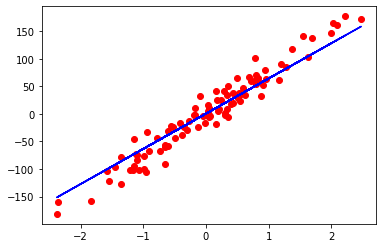

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Create the data by using the make_regression method 
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to a specified float Tensor: from float64 to float32, because errors will occur later
X = torch.from_numpy(X_numpy.astype(np.float32)) 
y = torch.from_numpy(y_numpy.astype(np.float32))
# set y_numpy from a column vector(100,) to a matrix vector(100,1)
y = y.view(y.shape[0], 1) # view method for reshaping tensors

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1 # one output: a scalar prediction
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # 3.1 Forward pass and loss computation
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # 3.2 Backward pass and update weights
    loss.backward()
    optimizer.step()

    # 3.3 zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0: # print every 10 iterations
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot

# convert back to numpy
# prevent this operation from being tracked in our computational graph with detach()
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

## 5. A very simple Logistic Regression with Pytorch.

This is a binary classification problem which predicts cancer based on the input features.

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Load and Prepare the data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape
print(n_samples, n_features)

# create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale all values with StandardScaler-> zero mean and unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# tranform our data into tensors and in float32 dtype
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

# convert column target vectors from (n,) to matrix vectors of (n,1) 
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

# 1) define the Model
# Linear model f = wx + b , sigmoid at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()  # binary_crossentropy
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass(calculate the gradients) and update the weights
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# evaluate the model. this process is not a part of our computation graph
with torch.no_grad():
    y_predicted = model(X_test)
    # all predictions are either 0 or 1, that is why we round them
    y_predicted_cls = y_predicted.round()
    # accuracy = (number of y_predicted==y_test) / (number of y_test)
    # equal function: eq()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')  # use of item() method as accuracy is just a scalar!

569 30
epoch: 10, loss = 0.5280
epoch: 20, loss = 0.4513
epoch: 30, loss = 0.3992
epoch: 40, loss = 0.3611
epoch: 50, loss = 0.3320
epoch: 60, loss = 0.3087
epoch: 70, loss = 0.2897
epoch: 80, loss = 0.2738
epoch: 90, loss = 0.2602
epoch: 100, loss = 0.2484
accuracy: 0.8860


## 6. Dataloaders, batch training and transforms.

If we have large datasets, it is more convenient to divide samples into smaller batches. So, for 100 samples and a batch size of 20, we have 5 iterations for 1 epoch.

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

# gradient computation etc. not efficient for whole data set
# -> divide dataset into small batches

'''
# training loop
for epoch in range(num_epochs):
    # loop over all batches
    for i in range(total_batches):
        batch_x, batch_y = ...
'''

# epoch = one forward and backward pass of ALL training samples
# batch_size = number of training samples used in one forward/backward pass
# number of iterations = number of passes, each pass (forward+backward) using [batch_size] number of sampes
# e.g : 100 samples, batch_size=20 -> 100/20=5 iterations for 1 epoch

# --> DataLoader can do the batch computation for us

# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):

    def __init__(self):
        # Initialize data, download, etc.
        # read with numpy or pandas
        xy = np.loadtxt('/content/wine.txt', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # here the first column is the class label, the rest are the features
        # also convert to tensors
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # support indexing such that dataset[i] can be used to get i-th sample
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # we can call len(dataset) to return the size
    def __len__(self):
        return self.n_samples


# create dataset
dataset = WineDataset()

# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

# Load whole dataset with DataLoader
# shuffle: shuffle data, good for training-> if you see the dataset, all first rows have samples for class 1, the next rows have 2, so we must suffle it!
# num_workers: faster loading with multiple subprocesses
# !!! IF YOU GET AN ERROR DURING LOADING, SET num_workers TO 0 !!!
train_loader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

# convert the dataloader object to an iterator and look at one random sample
dataiter = iter(train_loader)
data = next(dataiter) 
# unpack data
features, labels = data
print(features, labels) # you will see 4 training samples with their corresponding labels, because we set batch size=4 when creating the dataloader

# Dummy Training loop
num_epochs = 2

total_samples = len(dataset)  # it is total_samples=178, batch_size=4, so we will have 178/4=45 iterations for each epoch
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):


        # here you must do:
        # 1. forward pass and compute loss
        # 2. compute gradients and backward pass
        # 3. update weights
        
        # here: 178 samples, batch_size = 4, n_iters=178/4=44.5 -> 45 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')


tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])
tensor([[1.2530e+01, 5.5100e+00, 2.6400e+00, 2.5000e+01, 9.6000e+01, 1.7900e+00,
         6.0000e-01, 6.3000e-01, 1.1000e+00, 5.0000e+00, 8.2000e-01, 1.6900e+00,
         5.1500e+02],
        [1.4100e+01, 2.0200e+00, 2.4000e+00, 1.8800e+01, 1.0300e+02, 2.7500e+00,
         2.9200e+00, 3.2000e-01, 2.3800e+00, 6.2000e+00, 1.0700e+00, 2.7500e+00,
         1.0600e+03],
        [1.3050e+01, 5.8000e+00, 2.1300e+00, 2.1500e+01, 8.6000e+01, 2.6200e+00,
         2.6500e+00, 3.0000e-01, 2.0100e+00, 2.6000e+00, 7.3000e-01, 3.1000e+00,
         3.8000e+02],
        [1.1840e+01, 8.9000e-01, 2.5800e+00, 1.8000e+01, 9.4000e+01, 2.2000e+00,
         2.2100e+00, 2.2000e-01, 2.3500e+00, 3.0500e+00, 7.9000e-01, 3.0800e+00,
         5.2000e+02]]) tensor([[3.],
        [1.],
        [2.],
        [2.]])
178 45
Epoch

In [ ]:
# some famous datasets are available in torchvision.datasets
# e.g. MNIST, Fashion-MNIST, CIFAR10, COCO
# and this is how we can load them

train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=3, 
                                           shuffle=True)

# look at one random sample
dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

torch.Size([3, 1, 28, 28]) torch.Size([3])


In [ ]:
'''
Transforms can be applied to PIL images, tensors, ndarrays, or custom data
during creation of the DataSet
complete list of built-in transforms: 
http://man.hubwiz.com/docset/torchvision.docset/Contents/Resources/Documents/transforms.html
https://pytorch.org/docs/stable/torchvision/transforms.html
On Images
---------
CenterCrop, Grayscale, Pad, RandomAffine
RandomCrop, RandomHorizontalFlip, RandomRotation
Resize, Scale
On Tensors
----------
LinearTransformation, Normalize, RandomErasing
Conversion
----------
ToPILImage: from tensor or ndrarray
ToTensor : from numpy.ndarray or PILImage
Generic
-------
Use Lambda 
Custom
------
Write own class
Compose multiple Transforms
---------------------------
composed = transforms.Compose([Rescale(256),
                               RandomCrop(224)])
'''

import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np

# our own custom wine dataset class
class WineDataset(Dataset):

    def __init__(self, transform=None): # now, we include transform argument
        xy = np.loadtxt('/content/wine.txt', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here, we use a class later below
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        # init transform
        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]
        
        # if available, apply transform
        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])
